## AWS 
---
__Elo notes__

Amazon S3 is object storage built to store and retrieve any amount of data from anywhere – web sites and mobile apps, corporate applications, and data from IoT sensors or devices.

[Getting Started with Amazon Simple Storage Service](http://docs.aws.amazon.com/AmazonS3/latest/gsg/GetStartedWithS3.html)

[boto: A Python interface to Amazon Web Services](http://boto.cloudhackers.com/en/latest/)

In [1]:
import numpy as np
import pandas as pd

import os
import boto

import matplotlib
import matplotlib.pyplot as plt

% pylab inline
% matplotlib inline
% autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading in subsets of the file as iterates
chunks = pd.read_csv('https://s3-us-west-2.amazonaws.com/bucket/c.csv', iterator=True, chunksize=100)

In [3]:
df = pd.concat(list(chunks))

In [4]:
df[:4]

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 2 columns):
cancer        301 non-null float64
population    301 non-null float64
dtypes: float64(2)
memory usage: 7.1 KB


In [6]:
df['rate'] = df.cancer/df.population 

In [7]:
df[:2]

,cancer,population,rate
0,1.0,445.0,0.002247
1,0.0,559.0,0.000000


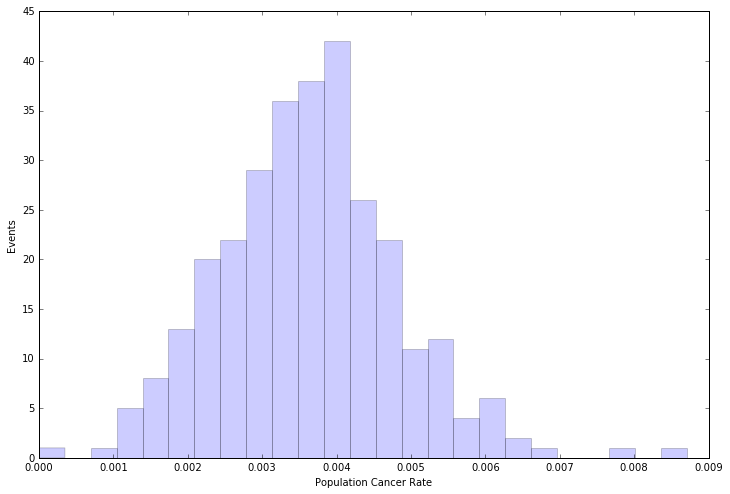

In [8]:
plt.figure(figsize = (12, 8))
plt.hist(df.rate, bins = 25, alpha=.2)
plt.xlabel('Population Cancer Rate')
plt.ylabel('Events')
plt.savefig('s3hist.png')
plt.show()

In [9]:
df.to_csv('cancer_rates.csv', columns=['rate'], index=False)

In [10]:
!head cancer_rates.csv

rate
0.00224719101124
0.0
0.00443131462334
0.00587371512482
0.00402144772118
0.00460299194476
0.00105263157895
0.00512295081967
0.00456204379562


In [11]:
def to_aws():
    ak = os.environ['AK']
    sak = os.environ['SAK']
    
    conne = boto.connect_s3(ak, sak)
    
    # Get list of all buckets
#     all_buckets = [bucket.name for bucket in conne.get_all_buckets()]
    
    elo_bucket = 'bucket'
    
    # Check if the bucket exists. If exist get bucket, else create one
    
    if conne.lookup(elo_bucket) is None:
        bucket = conne.create_bucket(elo_bucket, policy='public_read')
    else:
        bucket = conne.get_bucket(elo_bucket)

    # Write the new file
    file_object0 = bucket.new_key('s3hist.png')
    file_object0.set_contents_from_filename('s3hist.png')
    
    file_object1 = bucket.new_key('cancer_rates.csv')
    file_object1.set_contents_from_filename('cancer_rates.csv')
    
    # Delete a file in the bucket
#     hazme = bucket.new_key('cancer_rates.csv')
#     hazme.delete()
    
    # Delete bucket
#     conne.delete_bucket('elo_bucket')




In [12]:
to_aws()